<a href="https://colab.research.google.com/github/VishmaPratimDasHere/Machine-Learning/blob/main/1_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00. Intro

Go slow (that's what she said), and don't forget to have fun!

In [ ]:
# Import the necessary
import torch
import torch.nn as nn # Use to make weights and biases part of the neural network
import torch.nn.functional as F # Gives us the Activation functions
import pandas as pd # Data manipulation
import numpy as np
from torch.optim import SGD # import
import matplotlib.pyplot as plt # Plotting graphs
import seaborn as sns

In [ ]:
class BasicNN( nn.Module ):
  def __init__(self):
    super().__init__()
    self.w00_10 = nn.Parameter( torch.tensor(1.7), requires_grad=True)
    self.b00_10 = nn.Parameter( torch.rand(1), requires_grad=True)
    self.w00_11 = nn.Parameter( torch.rand(1), requires_grad=True)
    self.b00_11 = nn.Parameter( torch.rand(1), requires_grad=True)
    self.w10_20 = nn.Parameter( torch.rand(1), requires_grad=True)
    self.b_20 = nn.Parameter( torch.rand(1), requires_grad=True)
    self.w11_20 = nn.Parameter( torch.rand(1), requires_grad=True)

  def forward(self, input):

    # Layer 1
    val10 = F.relu(self.w00_10 * input + self.b00_10)
    val11 = F.relu(self.w00_11 * input + self.b00_11)

    # Layer 2
    val20 = F.relu(self.w10_20 * val10 + self.w11_20 * val11 + self.b_20)
    return val20



In [ ]:
# Prepare the training data
input_doses = torch.arange(start=0, end=1.1, step=0.1)
print("input doses: "+str(input_doses))
output = torch.rand(11)
output[0]=0
print("Output: "+str(output))
model = BasicNN()
output_values = model(input_doses)
print("model output: "+str(output_values))


input doses: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
Output: tensor([0.0000, 0.5255, 0.8728, 0.5692, 0.8137, 0.6532, 0.1191, 0.5627, 0.8422,
        0.5975, 0.2709])
model output: tensor([1.4841, 1.5634, 1.6427, 1.7220, 1.8013, 1.8805, 1.9598, 2.0391, 2.1184,
        2.1977, 2.2770], grad_fn=<ReluBackward0>)


## 01. Before optimization

Text(0, 0.5, 'Effectiveness')

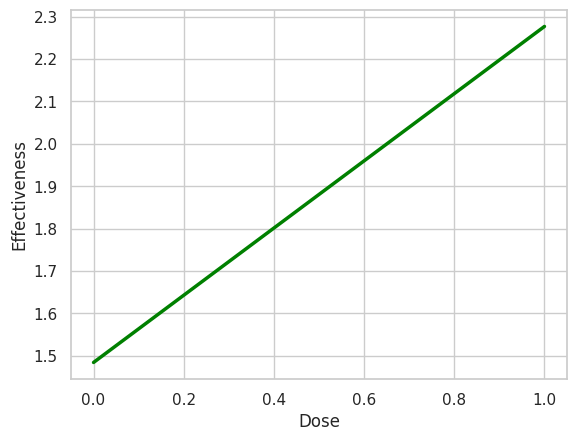

In [ ]:
sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
             y=output_values.detach(),
             color='green',
             linewidth=2.5)
plt.xlabel("Dose")
plt.ylabel("Effectiveness")

In [ ]:
# Create a SGD object
optimizer = SGD(model.parameters(), lr=0.001)
range(len(input_doses))

range(0, 11)

In [ ]:
# Optimize using loop
for epoch in range(100): # run 100 epochs

  total_loss=0

  # Nested for loop: calculate derivatives and total losses
  for iteration in range(len(input_doses)):

    x=input_doses[iteration]
    y1=output[iteration]

    y2=model(x)
    loss=(y2-y1)**2

    loss.backward() # calculates the derivatives and adds them

    total_loss += float(loss)

  optimizer.step() # Use SGD to optimize weights and biases
  optimizer.zero_grad() # resets the gradients to zero





In [ ]:
model.w00_10.data

tensor(1.6937)

## 10. After Optimization

Text(0, 0.5, 'Effectiveness')

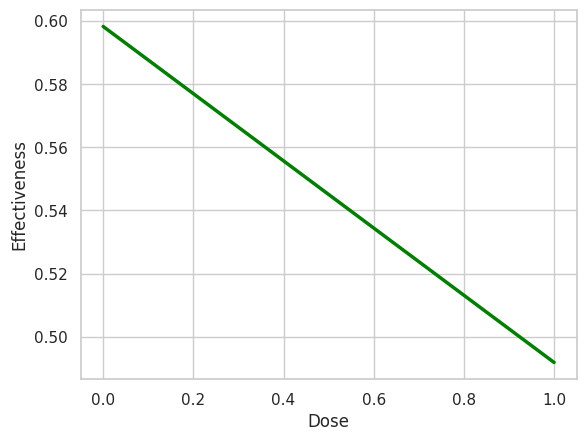

In [ ]:
sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
             y=model(input_doses).detach(),
             color='green',
             linewidth=2.5)
plt.xlabel("Dose")
plt.ylabel("Effectiveness")